## Build a model which will predict the profit that a startup company can have when Administraiton amount, R&D spend amount, Marlketting amount along with the state of the organization is specified

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read data

In [5]:
dataset = pd.read_csv("50_Startups.csv")

### Perform EDA

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.loc[0,'State']='XYZ'

In [ ]:
sns.countplot(dataset,x='State')

### Feature selection

In [ ]:
dataset[['R&D Spend','Administration','Marketing Spend','Profit']].corr()

<Axes: >

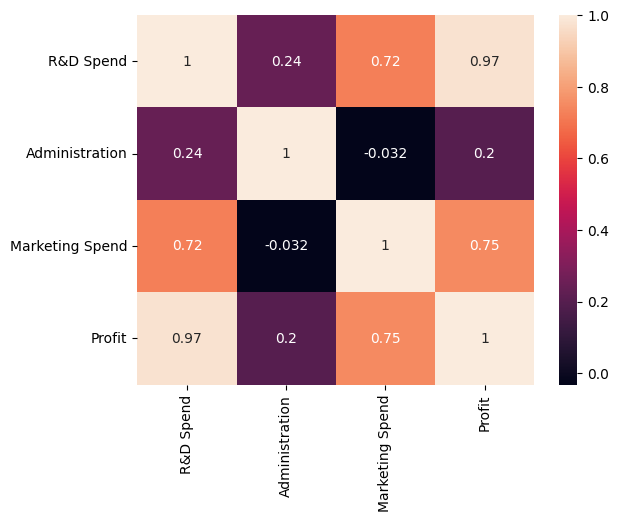

In [59]:
sns.heatmap(dataset[['R&D Spend','Administration','Marketing Spend','Profit']].corr(),annot=True)

In [ ]:
dataset

In [6]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Encoding

In [ ]:
#nominal : One hot encoding
#ordinal : LabelEncoding

In [7]:
dataset1 = pd.get_dummies(dataset,dtype='int')  #for one hot encoding

In [8]:
dataset1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [ ]:
# dataset = pd.read_csv("cars93.csv")

In [9]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()  #create the object of one hot encoder

In [11]:
output = ohe.fit_transform(dataset[['State']]).toarray()  #learn & transform the categorical column into array

In [12]:
output

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0

In [13]:
dataset.drop('State',axis=1,inplace=True)
dataset

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [14]:
output= pd.DataFrame(output,columns=['California',"Florida", "New York"]) #convert array to dataframe

In [15]:
dataset = pd.concat([dataset,output],axis=1) #combine with original dataset
dataset

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0
5,131876.90,99814.71,362861.36,156991.12,0.0,0.0,1.0
6,134615.46,147198.87,127716.82,156122.51,1.0,0.0,0.0
7,130298.13,145530.06,323876.68,155752.60,0.0,1.0,0.0
8,120542.52,148718.95,311613.29,152211.77,0.0,0.0,1.0
9,123334.88,108679.17,304981.62,149759.96,1.0,0.0,0.0


In [16]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


### Divide input & output

In [17]:
X = dataset.drop('Profit',axis=1)
y = dataset['Profit']

### Split training & Testing data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

### Build the model

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
test_pred = lr.predict(X_test)
test_pred

array([ 74204.24896079, 116566.94205365,  96481.75206871,  57440.67122773,
       134531.20435248,  98963.15266497,  97302.53943633, 100426.50977314,
        87823.65877005, 111618.76401953])

In [23]:
y_test

41     77798.83
20    118474.03
32     97427.84
43     69758.98
10    146121.95
29    101004.64
33     96778.92
25    107404.34
34     96712.80
19    122776.86
Name: Profit, dtype: float64

In [24]:
train_pred = lr.predict(X_train)

In [25]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
mean_absolute_percentage_error(y_test,test_pred)

np.float64(0.06013015577778084)

In [26]:
mean_absolute_percentage_error(y_train,train_pred)

np.float64(0.11778132363012332)

In [27]:
r2_score(y_test,test_pred)

0.8715447367658617

In [28]:
r2_score(y_train,train_pred)

0.9531320407149488

In [29]:
lr.coef_

array([ 7.97082045e-01, -4.00834055e-02,  3.65481303e-02,  2.08532522e+02,
        1.29314383e+02, -3.37846905e+02])

In [30]:
lr.intercept_

np.float64(49226.38807202651)

In [ ]:
# y = b1* x1 + b2*x2 + b3* x3 + b4 * x4 +b5* x5 + b6 * x6 + intercept

In [31]:
# R& D : 20000
# admin : 45000
# market: 25000
#state: california

In [48]:
#as state is california we are taking coeff from array at position 3 & remaining(position 4 & 5) are not considered
c =0
f=0
n=1
profit = lr.coef_[0]* dataset.loc[3,'R&D Spend'] + lr.coef_[1]* dataset.loc[3,'Administration'] + lr.coef_[2] * dataset.loc[3,'Marketing Spend'] + lr.coef_[5] * n + lr.intercept_

In [49]:
print("The profit which company can amke is", profit)

The profit which company can amke is 173213.65469692613


In [42]:
a = 1
b = -2
c = 3
d = 4

ans = a*10+ b* 10 + c* 10 + d * 10
ans

60